In [505]:
import pandas as pd

suicide_rates_df = pd.read_csv(r'./data/2019_who_crude_suicide_rates_per_100k_population_data.csv')
reduced_df = suicide_rates_df.filter(items=['Location', 'Dim1', 'Dim2', 'Value'])
country_names_from_data = set(suicide_rates_df.Location.to_numpy())

# TODO: to remove
filtered_df = suicide_rates_df.filter(items=['Location', 'Dim1', 'Dim2', 'Value'])

In [515]:
country_rates_df = reduced_df[reduced_df.Dim1 == 'Both sexes'].groupby(by='Location', as_index=False).sum()
country_rates_df.sort_values(by='Value', inplace=True, ascending=True)

print(country_rates_df.head())
print(country_rates_df.columns.values)
print()

print('Summay of suicide rate in all countries: \n', country_rates_df.describe())

                             Location  Value
4                 Antigua and Barbuda   3.71
13                           Barbados   4.45
66                            Grenada   5.17
137  Saint Vincent and the Grenadines   7.01
158              Syrian Arab Republic  26.21
['Location' 'Value']

Summay of suicide rate in all countries: 
              Value
count   183.000000
mean    172.197705
std     139.900612
min       3.710000
25%      67.530000
50%     121.950000
75%     249.155000
max    1020.270000


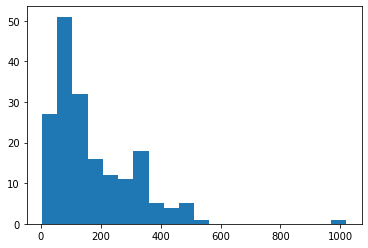

In [516]:
import matplotlib.pyplot as plt 

plt.hist(country_rates_df.Value, bins=20)
plt.show()

In [509]:
print(country_rates_df[country_rates_df.Value < 10].shape[0])
print(country_rates_df[(country_rates_df.Value >= 10) & (country_rates_df.Value < 30)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 30) & (country_rates_df.Value < 50)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 50) & (country_rates_df.Value < 70)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 70) & (country_rates_df.Value < 100)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 100) & (country_rates_df.Value < 150)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 150) & (country_rates_df.Value < 200)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 200) & (country_rates_df.Value < 300)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 300) & (country_rates_df.Value < 400)].shape[0])
print(country_rates_df[(country_rates_df.Value >= 400) & (country_rates_df.Value < 600)].shape[0])
print(country_rates_df[country_rates_df.Value >= 600].shape[0])

4
3
17
24
25
33
20
21
25
10
1


In [529]:
from typing import Optional

def get_country_rate(country_name: str) -> Optional[float]:
    """return the suicide rate of a country"""
    country_df = country_rates_df[country_rates_df.Location == country_name]
    if country_df.empty:
        return None
    return country_df.Value.values[0]

assert get_country_rate('hahaha') == None
assert get_country_rate('France') > 10

In [537]:
from typing import Tuple, Optional
import numpy as np 

# colors in RGB
green_1 = np.array((204, 255, 179)) / 255
green_2 = np.array((204,255,153)) / 255
green_3 = np.array((213,255,128)) / 255
green_4 = np.array((229,255,102)) / 255

yellow_1 = np.array((255,255,77)) / 255
yellow_2 = np.array((255,221,51)) / 255
yellow_3 = np.array((255,179,25)) / 255

orange_1 = np.array((255,128,0)) / 255
orange_2 = np.array((230,76,0)) / 255

red = np.array((204,34,0)) / 255

black = np.array((0,0,0)) / 255

gray = np.array((212,213,214)) / 255


def rate_to_rgb_color(rate: Optional[float]) -> np.array:
    """suicide rate (per 100,000 population) to mapping color"""
    if rate is None:
        return gray
    if rate < 10:
        return green_1
    if rate < 30:
        return green_2
    if rate < 50:
        return green_3
    if rate < 70:
        return green_4
    if rate < 100:
        return yellow_1 
    if rate < 150:
        return yellow_2
    if rate < 200:
        return yellow_3
    if rate < 300:
        return orange_1 
    if rate < 400:
        return orange_2
    if rate < 600:
        return red 
    else:
        return black

To install Cartopy on Window without Conda:
https://stackoverflow.com/questions/70177062/cartopy-not-able-to-identify-geos-for-proj-install-on-windows

then: 
pip install C:\Shapely\Shapely-1.8.2-cp310-cp310-win_amd64.whl

then:
pip install C:\Cartopy\Cartopy-0.20.2-cp310-cp310-win_amd64.whl

In [511]:
names_data_to_map = {
    'Bahamas': 'The Bahamas',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Brunei Darussalam': 'Brunei',
    'Congo': 'Republic of the Congo',
    'Czechia': 'Czech Republic',
    'Côte d’Ivoire': 'Ivory Coast',
    'China': "People's Republic of China",
    "Democratic People's Republic of Korea": 'North Korea',
    'Eswatini': 'Eswatini',
    'Gambia': 'The Gambia',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'Republic of Moldova': 'Moldova',
    'Russian Federation': 'Russia',
    'Republic of Korea': 'South Korea',
    'Syrian Arab Republic': 'Syria',
    'The former Yugoslav Republic of Macedonia': 'North Macedonia',
    'Timor-Leste': 'East Timor',
    'Türkiye': 'Turkey',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States of America',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam'
}

names_map_to_data = {value: key for (key, value) in names_data_to_map.items()}

In [521]:
print(country_rates_df[country_rates_df.Location == 'hahaha'])

Empty DataFrame
Columns: [Location, Value]
Index: []


In [542]:
import matplotlib.pyplot as plt 

def add_basic_map_features(ax: plt.Axes) -> None:
    ax.coastlines()
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.BORDERS)

12 countries skipped.
{'Somaliland', 'Falkland Islands', 'Antarctica', 'Western Sahara', 'Palestine', 'Puerto Rico', 'Greenland', 'Kosovo', 'Taiwan', 'French Southern and Antarctic Lands', 'Turkish Republic of Northern Cyprus', 'New Caledonia'}


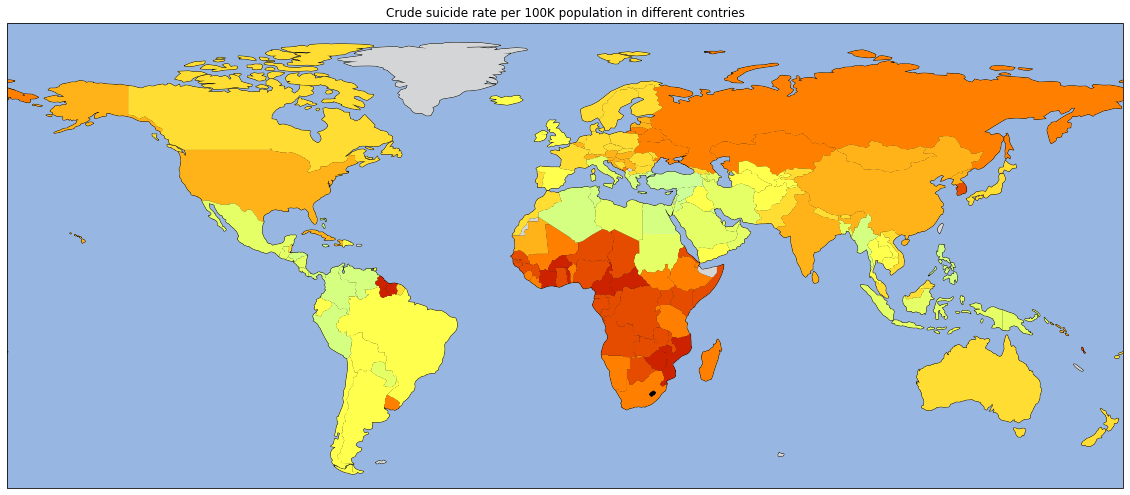

In [546]:
import matplotlib.pyplot as plt 
import cartopy
from cartopy.crs import PlateCarree
import cartopy.io.shapereader as shpreader

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=PlateCarree())
add_basic_map_features(ax)
extend_without_antarctica = (-180, 180, -60, 90)
ax.set_extent(extend_without_antarctica, PlateCarree())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

reader = shpreader.Reader(shpfilename)
countries = reader.records()

skipped = set()
for country in countries:
    name = country.attributes['NAME_EN']

    # TODO: refine
    if name in names_map_to_data:
        name = names_map_to_data[name]
    
    face_color = rate_to_rgb_color(get_country_rate(name))
    
    if np.equal(face_color, gray).all():
        skipped.add(name)

    ax.add_geometries(
        [country.geometry], 
        PlateCarree(),
        facecolor=face_color,
        label=country.attributes['ADM0_A3'])

# TODO: add legen for colors

print(f'{len(skipped)} countries skipped.')
print(skipped)

plt.title('Crude suicide rate per 100K population in different contries')
plt.show()